<a href="https://colab.research.google.com/github/frederickmarvel/GMX_Analytics_Pendle/blob/main/GMX_DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

In [38]:
df = pd.read_csv('gmx_merged_data.csv')

In [39]:
df['Date'] = pd.to_datetime(df['Date']).astype('int64')

In [40]:
correlation_matrix = df.corr()
correlation_with_date = correlation_matrix['Date'].drop('Date')
print(correlation_with_date)

APR              -0.326481
Swap              0.105126
Margin trading    0.296295
Mint GLP          0.187902
Burn GLP          0.262367
Liquidation       0.074563
Cumulative        0.979676
Name: Date, dtype: float64


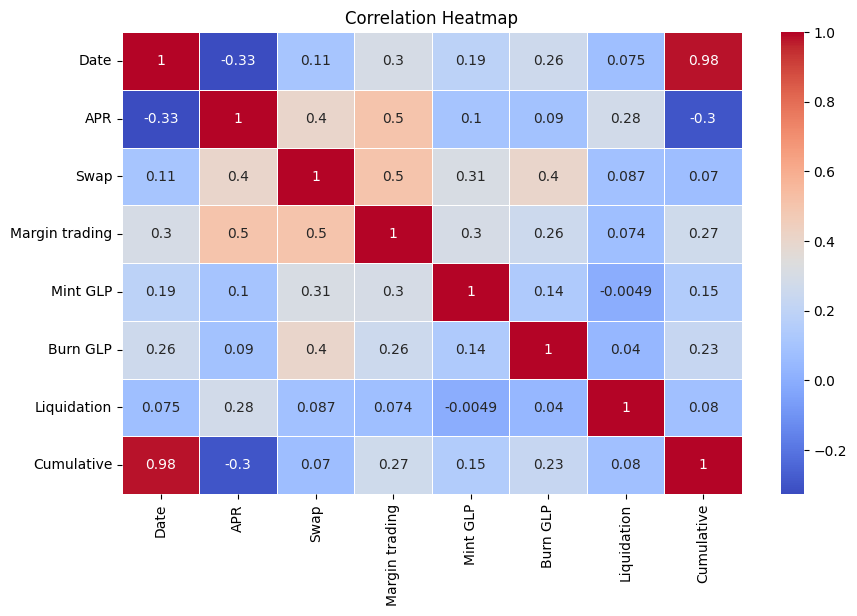

In [41]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Polynomial Regression

In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [65]:
df = pd.read_csv('gmx_merged_data.csv')
# Assume 'X' is the independent variable and 'y' is the dependent variable
X = df[['Cumulative']]
y = df[['APR']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
degree = 2  # Degree of the polynomial (adjust as needed)
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [67]:
y_pred_train = model.predict(X_train_poly)
y_pred_test = model.predict(X_test_poly)

# Calculate metrics (you can choose appropriate metrics based on your problem)
from sklearn.metrics import mean_squared_error, r2_score

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"Train R-squared: {train_r2}")
print(f"Test R-squared: {test_r2}")

Train RMSE: 36.11147750987082
Test RMSE: 43.96216456113334
Train R-squared: 0.133477086732953
Test R-squared: -0.03924925001798196


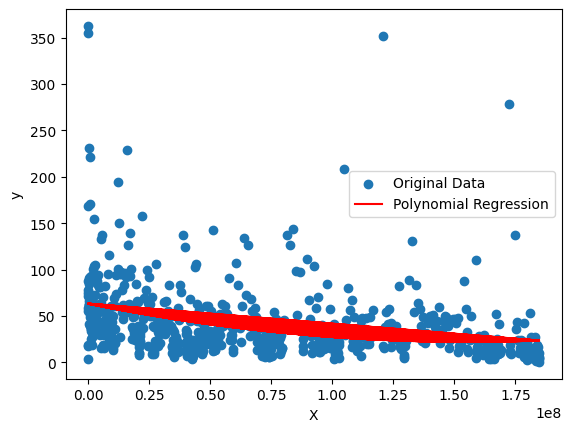

In [68]:
import matplotlib.pyplot as plt

plt.scatter(X, y, label='Original Data')
plt.plot(X_train, y_pred_train, color='red', label='Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()